In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
import gym

In [3]:
from gym.envs.registration import register

try:
    register(
        id = 'FrozenLakeNotSlippery-v0',
        entry_point='gym.envs.toy_text:FrozenLakeEnv',
        kwargs={'map_name' : '4x4', 'is_slippery': False},
        max_episode_steps=100,
        reward_threshold=0.78, # optimum = .8196
    )
except:
    print('Already registered!')

In [4]:
from IPython.display import clear_output

In [5]:
env = gym.make("FrozenLakeNotSlippery-v0")
env.reset()
for step in range(15):
    env.render()
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    time.sleep(0.3)
    clear_output(wait=True)
    if done:
        env.reset
    
env.close()

  (Up)
SFFF
FHFH
FFFH
HFFG


In [6]:
action_size = env.action_space.n
state_size = env.observation_space.n

In [17]:
q_table = np.zeros([state_size,action_size])

In [18]:
q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [9]:
EPOCHS=20000 #episodes, how many times the agent can play the game

In [10]:
ALPHA = 0.8  # LEARNING RATE
GAMMA = 0.95 # DISCOUNT RATE

In [11]:
epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.001

In [12]:
def epsilon_greed_action_selection(epsilon,q_table, discrete_state):
    random_number = np.random.random()
    
    if random_number > epsilon:
        
        state_row = q_table[discrete_state,:]
        
        action = np.argmax(state_row)
        
    else:
        action = env.action_space.sample()
        
    return action

In [13]:
s_row = np.array([0,0.1,0,0])

In [14]:
np.argmax(s_row)

1

In [15]:
def compute_next_q_value(old_q_value,reward,next_optimal_q_value):
    return old_q_value + ALPHA * (reward + GAMMA * next_optimal_q_value - old_q_value)

In [16]:
def reduce_epsilon(epsilon, epoch):
    return min_epsilon + (max_epsilon-min_epsilon)*np.exp(-decay_rate*epoch)

<IPython.core.display.Javascript object>


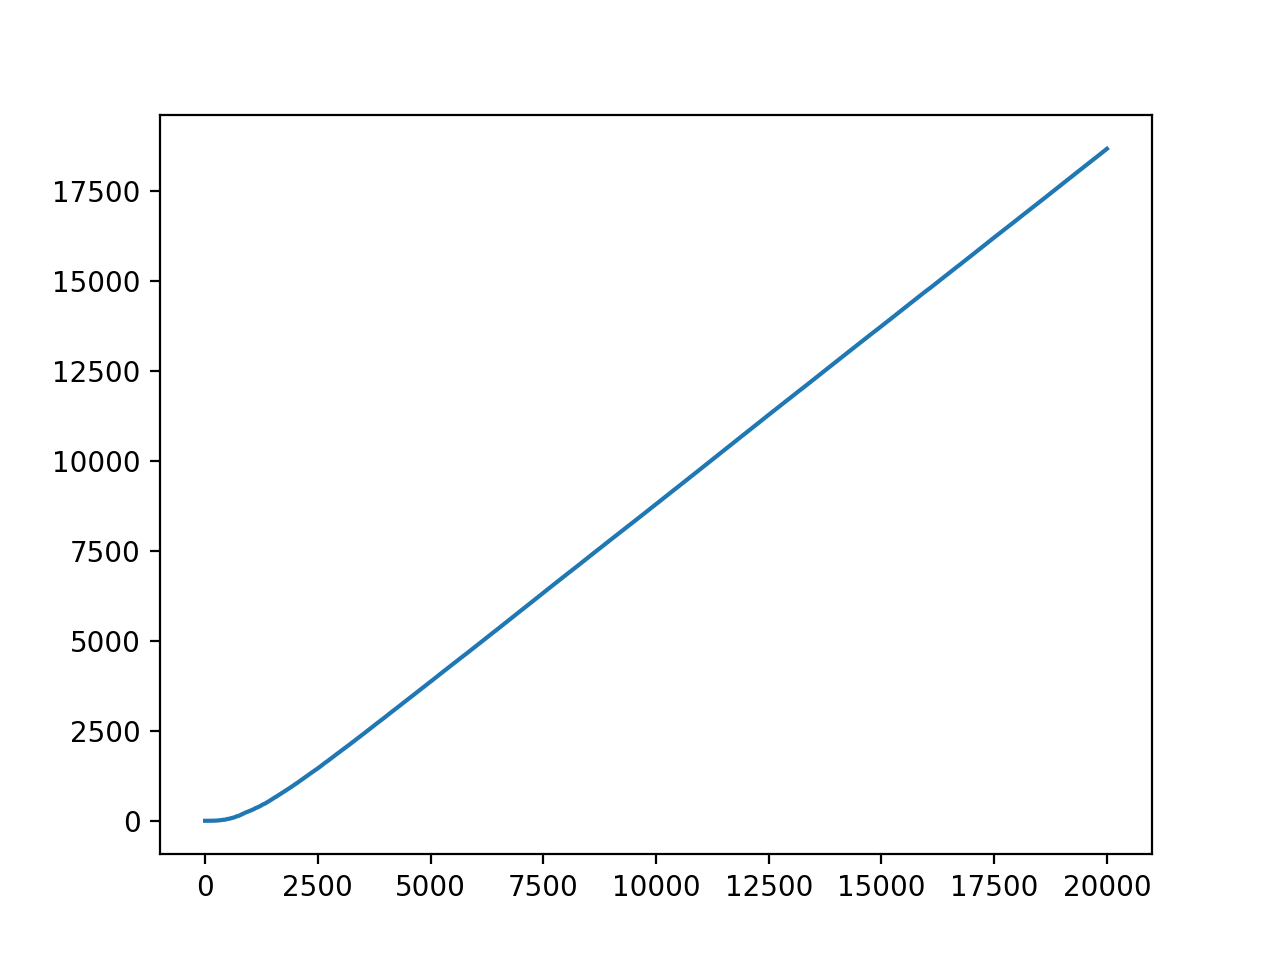

In [19]:
rewards = []
log_interval = 1000


fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.canvas.draw()
epoch_plot_tracker = []
total_reward_plot_tracker = []


for episode in range(EPOCHS):
    
    state = env.reset()
    done = False
    total_rewards = 0
    
    while not done:
        action = epsilon_greed_action_selection(epsilon, q_table, state)
        new_state, reward, done, info = env.step(action)
        old_q_value = q_table[state,action]
        
        next_optimal_q_value = np.max(q_table[new_state,:])
        
        next_q = compute_next_q_value(old_q_value,reward,next_optimal_q_value)
        q_table[state,action] = next_q
        total_rewards = total_rewards+reward
        
        state = new_state
        
    episode += 1
    epsilon = reduce_epsilon(epsilon,episode)
    rewards.append(total_rewards)
    
    total_reward_plot_tracker.append(np.sum(rewards))
    epoch_plot_tracker.append(episode)
    
    
    if episode % log_interval == 0:
        ax.clear()
        ax.plot(epoch_plot_tracker,total_reward_plot_tracker)
        fig.canvas.draw()
    
env.close()

In [30]:
q_table

array([[0.73509189, 0.77378094, 0.77378094, 0.73509189],
       [0.73509189, 0.        , 0.81450625, 0.77378094],
       [0.77378094, 0.857375  , 0.77378094, 0.81450625],
       [0.81450625, 0.        , 0.77365922, 0.77378089],
       [0.77378094, 0.81450625, 0.        , 0.73509189],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9025    , 0.        , 0.81450625],
       [0.        , 0.        , 0.        , 0.        ],
       [0.81450625, 0.        , 0.857375  , 0.77378094],
       [0.81450625, 0.9025    , 0.9025    , 0.        ],
       [0.857375  , 0.95      , 0.        , 0.857375  ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9025    , 0.95      , 0.857375  ],
       [0.9025    , 0.95      , 1.        , 0.9025    ],
       [0.        , 0.        , 0.        , 0.        ]])

In [31]:
state = env.reset()

for steps in range(100):
    env.render()
    action = np.argmax(q_table[state,:])
    state,reward,done,info = env.step(action)
    
    time.sleep(1)
    clear_output(wait=True)
    
    if done:
        break
    
env.close()

  (Right)
SFFF
FHFH
FFFH
HFFG
